In [120]:
# -*- coding: utf-8 -*-
# 따릉이 데이터 셋 
import pandas as pd
import numpy as np
import matplotlib as plt

data = pd.read_csv("C:/Users/GSE/suicide/Bike/Bike_csv/predict_data.csv")#,encoding='CP949')

data =data.fillna(0) # 데이터에 nan 값 전부 0처리 
data.head()

,hour,minutes,count,대여/반납,holiday,weather,Rain,Month,Day,Day_w,Time,AM/PM,humidity,wind,Snow
0,0,0,20.000000,0,2,-3.2,0.0,1,1,1,0:00,1,40.0,0.5,0.0
1,0,30,20.500000,0,2,-3.2,0.0,1,1,1,0:30,1,40.0,0.5,0.0
2,1,0,20.000000,1,2,-3.3,0.0,1,1,1,1:00,1,41.0,0.7,0.0
3,2,0,16.250000,-1,2,-3.7,0.0,1,1,1,2:00,1,42.0,0.9,0.0
4,2,30,13.833333,-5,2,-3.7,0.0,1,1,1,2:30,1,42.0,0.9,0.0


In [121]:
# 날짜를 인덱스 처리
data['Time']
data = data.set_index(['Time'])
data.index = pd.to_datetime(data.index)

In [122]:
# x값과 y값 구분
import pandas as pd
import numpy as np

# x: data / y : 결과값

x = data.drop(["count"], axis=1)
y = data["count"].astype(int)
#print(x)
y.mean()
y.median()

18.0

In [123]:
#train,validation,test set 으로 나눔  

import numpy as np
train_size = int(len(y)* 0.6)
val_size = int(len(y)*0.8)
test_size = len(y)- val_size

train_x, test_x = np.array(x[0:train_size]),np.array(x[val_size:])
val_x, val_y = np.array(x[train_size:val_size]),np.array(y[train_size:val_size])
train_y, test_y = np.array(y[0:train_size]),np.array(y[val_size:])
print(train_size,",",val_size,",",test_size)

2736 , 3648 , 912


In [124]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values, convertExp=True):

    if convertExp:
        predicted_values = np.exp(predicted_values),
        actual_values = np.exp(actual_values)

    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)

    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)

    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    difference = np.square(difference)

    # 평균을 낸다.
    mean_difference = difference.mean()

    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)

    return score

In [119]:
# gradientBosstingRegressor에 대한 GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
gb_params={'n_estimators':[10,50,100,150],#,500,1000],
            'learning_rate': [0.05,0.01],#0.01,
            'max_depth':[5,10,15,20],
            'min_samples_leaf':[5,10,15,20],
            'max_features':[1,3,5,7,9,11,13],
           'min_samples_split': [0.1]}
n_jobs=4 
gb = GradientBoostingRegressor()
#gb_params={'max_depth':range(1,11,1),'n_estimators':[1,10,100]}
grid_gb=GridSearchCV(gb,gb_params,scoring='neg_mean_absolute_error',cv=5)
grid_gb.fit(train_x,train_y)
grid_gb.best_params_
#preds = grid_gb.predict(val_x)
#print('RMSLE Value for GradientBoosting {}'.format(rmsle(np.exp(val_y),np.exp(preds),False)))

{'learning_rate': 0.05,
 'max_depth': 20,
 'max_features': 1,
 'min_samples_leaf': 20,
 'min_samples_split': 0.1,
 'n_estimators': 150}

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(learning_rate = 0.05, max_depth =15, max_features = 11, min_samples_leaf =17, n_estimators =50  )
gbr.fit(train_x,train_y)
#grid_gb.best_params_
#preds = grid_gb.predict(val_x)
#print('RMSLE Value for GradientBoosting {}'.format(rmsle(np.exp(val_y),np.exp(preds),False)))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='ls', max_depth=15,
                          max_features=11, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=17, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

MSE: 61.8831


C:\Users\GSE\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GSE\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GSE\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GSE\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45225 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GSE\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\GSE\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50668 missing from current font.
 

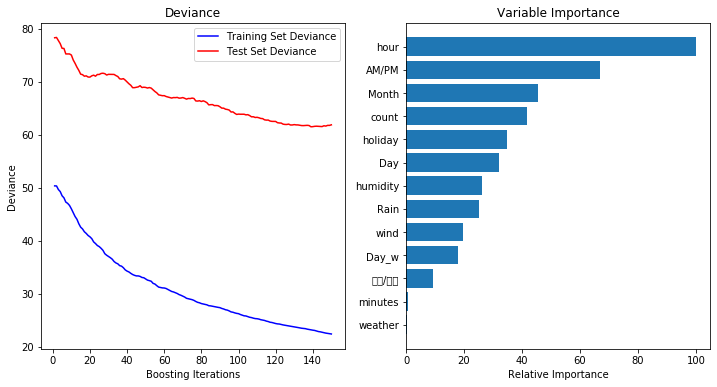

In [125]:

# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

# #############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
params = {'n_estimators': 100, 'max_depth': 15, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls','max_features' :13,'min_samples_leaf' : 17}

params = {'learning_rate': 0.05,'max_depth': 20,'max_features': 1,'min_samples_leaf': 20,'min_samples_split': 0.1,'n_estimators': 150}
gbr = ensemble.GradientBoostingRegressor(**params)
gbr.fit(train_x,train_y)
mse = mean_squared_error(test_y, gbr.predict(test_x))
print("MSE: %.4f" % mse)

# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, pred_y in enumerate(gbr.staged_predict(test_x)):
    test_score[i] = gbr.loss_(test_y, pred_y)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gbr.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = gbr.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, data.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [126]:
import sklearn.metrics as metrics
import math
# Show model results of training set
train_pred_y = gbr.predict(train_x)
mae = metrics.mean_absolute_error(train_y,train_pred_y)
mse = metrics.mean_squared_error(train_y,train_pred_y)
print ("TRAINING SET")
print ("============")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("RMSLE:              ", rmsle(train_pred_y,train_y))
print ("r2:                 ", gbr.score(train_x,train_y))
print ("feature_importances:",gbr.feature_importances_)
print ("n_features:         ",gbr.n_features_)
print ("last column (% Iron Concentrate) is the highest feature_importances")

TRAINING SET
MAE:                 3.853841653997526
RMSE:                4.733962297130674
RMSLE:               4.724542155589132
r2:                  0.5613160736265144
feature_importances: [0.23800368 0.00133727 0.09949672 0.02212498 0.08294589 0.00101676
 0.05982002 0.10798265 0.07651489 0.04265951 0.1589471  0.06217919
 0.04697135]
n_features:          13
last column (% Iron Concentrate) is the highest feature_importances


In [127]:
import sklearn.metrics as metrics
import math
# Show model results of training set
val_pred_y = gbr.predict(val_x)
mae = metrics.mean_absolute_error(val_y,val_pred_y)
mse = metrics.mean_squared_error(val_y,val_pred_y)
print ("Validation SET")
print ("============")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("RMSLE:              ", rmsle(train_pred_y,train_y))
print ("r2:                 ", gbr.score(train_x,train_y))
print ("feature_importances:",gbr.feature_importances_)
print ("n_features:         ",gbr.n_features_)
#print ("n_outputs:          ",gbr.n_outputs_)
print ("last column (% Iron Concentrate) is the highest feature_importances")

Validation SET
MAE:                 5.589498391046717
RMSE:                6.8165611881421055
RMSLE:               4.724542155589132
r2:                  0.5613160736265144
feature_importances: [0.23800368 0.00133727 0.09949672 0.02212498 0.08294589 0.00101676
 0.05982002 0.10798265 0.07651489 0.04265951 0.1589471  0.06217919
 0.04697135]
n_features:          13
last column (% Iron Concentrate) is the highest feature_importances


[Text(0.5, 1.0, 'val')]

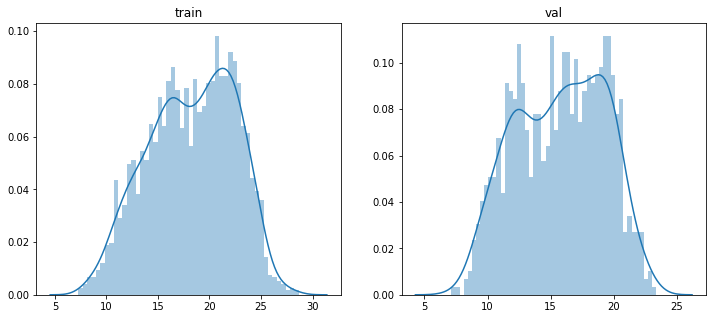

In [128]:
# 예측한 데이터 시각화 
import matplotlib.pyplot as plt
import seaborn as sns
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(train_pred_y,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(val_pred_y ,ax=ax2,bins=50)
ax2.set(title="val")


In [129]:
# train, test set으로 나눈다.
import numpy as np
train_size = int(len(y)* 0.8)
#test_size = len(y)- train_size
print(train_size,",",test_size)
#####################################
# train, test 나누기#
##########################33
#split to train and testing

train_x, test_x = np.array(x[0:train_size]),np.array(x[train_size:])
#val_x, val_y = np.array(x[train_size:val_size]),np.array(y[train_size:val_size])
train_y, test_y = np.array(y[0:train_size]),np.array(y[train_size:])
len(test_y)

3648 , 912


912

In [130]:
gbr.fit(train_x,train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='ls', max_depth=20,
                          max_features=1, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=20, min_samples_split=0.1,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

MSE: 50.9077


C:\Users\GSE\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GSE\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GSE\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GSE\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45225 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GSE\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\GSE\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50668 missing from current font.
 

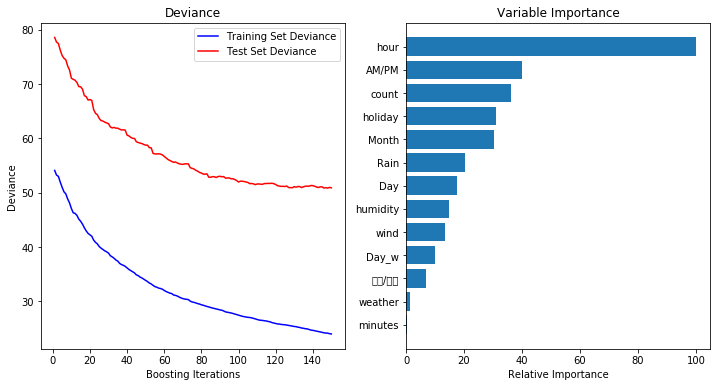

In [131]:
# overfitting check
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
"""
# #############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
params = {'n_estimators': 100, 'max_depth': 15, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls','max_features' :11,}

clf = ensemble.GradientBoostingRegressor(**params)
#GradientBoostingRegressor(learning_rate = 0.05, max_depth =15, max_features = 11, min_samples_leaf =17, n_estimators =100  )
clf.fit(train_x,train_y)
"""
gbr.fit(train_x,train_y)
mse = mean_squared_error(test_y, gbr.predict(test_x))
print("MSE: %.4f" % mse)

# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, pred_y in enumerate(gbr.staged_predict(test_x)):
    test_score[i] = gbr.loss_(test_y, pred_y)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gbr.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = gbr.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, data.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [132]:
import sklearn.metrics as metrics
import math
# Show model results of training set
train_pred_y = gbr.predict(train_x)
mae = metrics.mean_absolute_error(train_y,train_pred_y)
mse = metrics.mean_squared_error(train_y,train_pred_y)
print ("TRAINING SET")
print ("============")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("RMSLE:              ", rmsle(train_pred_y,train_y))
print ("r2:                 ", gbr.score(train_x,train_y))
print ("feature_importances:",gbr.feature_importances_)
print ("n_features:         ",gbr.n_features_)
print ("last column (% Iron Concentrate) is the highest feature_importances")

TRAINING SET
MAE:                 3.9714126000956913
RMSE:                4.9007633389579315
RMSLE:               4.891167339999906
r2:                  0.5651195508100443
feature_importances: [0.30973704 0.00141299 0.11260476 0.02122329 0.09579285 0.00451146
 0.06276411 0.09439218 0.05482899 0.03126646 0.12384823 0.04558728
 0.04203036]
n_features:          13
last column (% Iron Concentrate) is the highest feature_importances


In [133]:
import sklearn.metrics as metrics
import math
# Show model results of training set
test_pred_y = gbr.predict(test_x)
mae = metrics.mean_absolute_error(test_y,test_pred_y)
mse = metrics.mean_squared_error(test_y,test_pred_y)
print ("Test SET")
print ("============")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("RMSLE:              ", rmsle(train_pred_y,train_y))
print ("r2:                 ", gbr.score(train_x,train_y))
print ("feature_importances:",gbr.feature_importances_)
print ("n_features:         ",gbr.n_features_)
#print ("n_outputs:          ",gbr.n_outputs_)
print ("last column (% Iron Concentrate) is the highest feature_importances")

Test SET
MAE:                 5.875453354135285
RMSE:                7.134959807647619
RMSLE:               4.891167339999906
r2:                  0.5651195508100443
feature_importances: [0.30973704 0.00141299 0.11260476 0.02122329 0.09579285 0.00451146
 0.06276411 0.09439218 0.05482899 0.03126646 0.12384823 0.04558728
 0.04203036]
n_features:          13
last column (% Iron Concentrate) is the highest feature_importances


[Text(0.5, 1.0, 'val')]

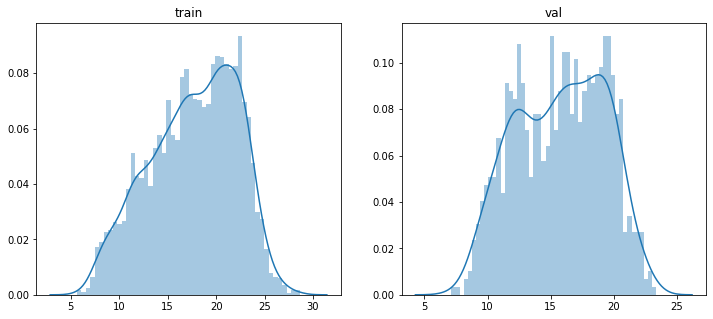

In [134]:
# 예측한 데이터 시각화 
import matplotlib.pyplot as plt
import seaborn as sns
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(train_pred_y,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(val_pred_y ,ax=ax2,bins=50)
ax2.set(title="val")
